<a href="https://colab.research.google.com/github/sunshineluyao/vis-basics/blob/main/chapter9/chapter9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Guiding Questions and Answers



### 1. What are the primary visual encoding idioms for network and tree data?


- **Node–Link Diagrams**: Use connection marks (lines) to depict relationships between nodes.
- **Matrix Views**: Represent adjacency relationships using area marks in a grid.
- **Containment**: Displays hierarchical structures through nested areas (e.g., treemaps).


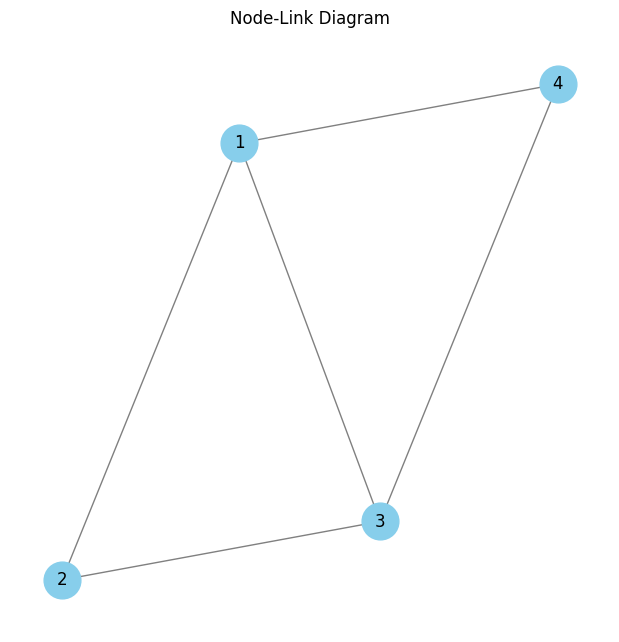

In [1]:
# Node-Link Diagram Example using NetworkX
import networkx as nx
import matplotlib.pyplot as plt

# Create a sample graph
G = nx.Graph()
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1), (1, 3)])

# Draw the graph
plt.figure(figsize=(6, 6))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray')
plt.title("Node-Link Diagram")
plt.show()


In this example, the `Node-Link Diagram` displays nodes and their relationships through connecting lines. It is visually intuitive for understanding small graphs.


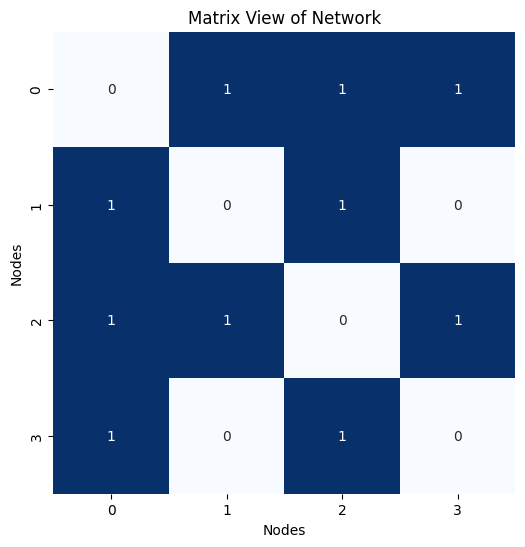

In [2]:
# Matrix View Example
import numpy as np
import seaborn as sns

# Adjacency matrix for the same graph
adj_matrix = nx.adjacency_matrix(G).todense()

# Plotting the adjacency matrix
plt.figure(figsize=(6, 6))
sns.heatmap(adj_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.title("Matrix View of Network")
plt.xlabel("Nodes")
plt.ylabel("Nodes")
plt.show()


### 2. How do node–link and matrix views differ in their representation of networks?



- **Node–Link Diagrams**:
  - Intuitive for small networks.
  - Effective for topological tasks such as path tracing and neighborhood search.
  - Prone to visual clutter with large, dense networks.

- **Matrix Views**:
  - Highly scalable, can handle dense networks up to a million edges.
  - Stable and predictable layouts.
  - Require training for effective use.
  - Less effective for topological analysis like path tracing.


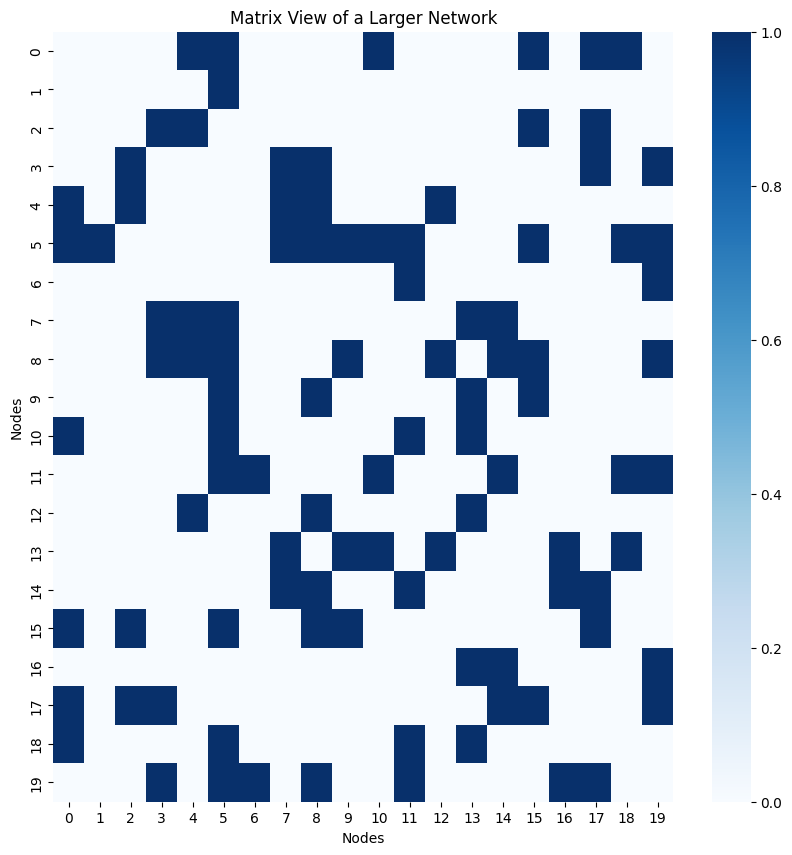

In [3]:
# Illustrating the scalability of matrix view with a larger network
large_G = nx.dense_gnm_random_graph(20, 50)

# Adjacency matrix for a larger graph
large_adj_matrix = nx.adjacency_matrix(large_G).todense()

# Plotting the adjacency matrix
plt.figure(figsize=(10, 10))
sns.heatmap(large_adj_matrix, cmap='Blues', cbar=True)
plt.title("Matrix View of a Larger Network")
plt.xlabel("Nodes")
plt.ylabel("Nodes")
plt.show()


The matrix view above illustrates its ability to handle denser, larger networks. However, interpreting specific topological paths is more challenging compared to node-link diagrams.


### 3. What are the benefits and limitations of force-directed placement?



#### Force-Directed Placement

**Definition**:  
Force-directed placement is a widely used algorithmic approach for laying out graphs or networks. It simulates physical forces to determine the positions of nodes and the paths of their connections (links). The layout evolves iteratively to optimize readability and reduce clutter.

#### How It Works:
1. **Nodes as Repelling Particles**:
   - Nodes are treated as particles that repel each other, similar to charges or magnets with like poles.
   - This prevents nodes from clustering too closely together.

2. **Links as Springs**:
   - Links between nodes act like springs, pulling connected nodes closer together.
   - The "spring" strength depends on the desired distance between connected nodes, balancing the layout.

3. **Optimization**:
   - The algorithm adjusts the positions of nodes iteratively, minimizing the system's overall "energy."
   - It tries to find a balance where repulsive and attractive forces are in equilibrium.

4. **Stopping Condition**:
   - The process continues until the layout reaches a stable state, or a specified number of iterations is completed.

#### Key Features:
- **Random Initialization**: Nodes often start at random positions.
- **Iterative Refinement**: The layout improves gradually over iterations.
- **Interactive Use**: Can show the dynamic adjustment process, although it might stabilize automatically.

#### Advantages:
- Intuitive and visually appealing for small-to-medium networks.
- Tends to group related nodes together naturally, aiding in detecting clusters.

#### Limitations:
- **Scalability**: Becomes visually cluttered ("hairball effect") for large or dense networks.
- **Nondeterministic**: Different runs might produce different layouts unless the random seed is fixed.
- **Computationally Intensive**: Requires significant processing for large datasets.

#### Example Use:
- Social networks, biological networks, and communication graphs frequently use force-directed layouts to intuitively display relationships and clusters.
- **Benefits**:
  - Conceptually simple and easy to implement.
  - Visually clusters related nodes based on connection strength.
  - Suitable for exploring small to medium-sized networks.

- **Limitations**:
  - Nondeterministic: Layouts differ across runs.
  - Poor scalability: Clutters with larger graphs.
  - May produce misleading spatial proximity unrelated to network structure.


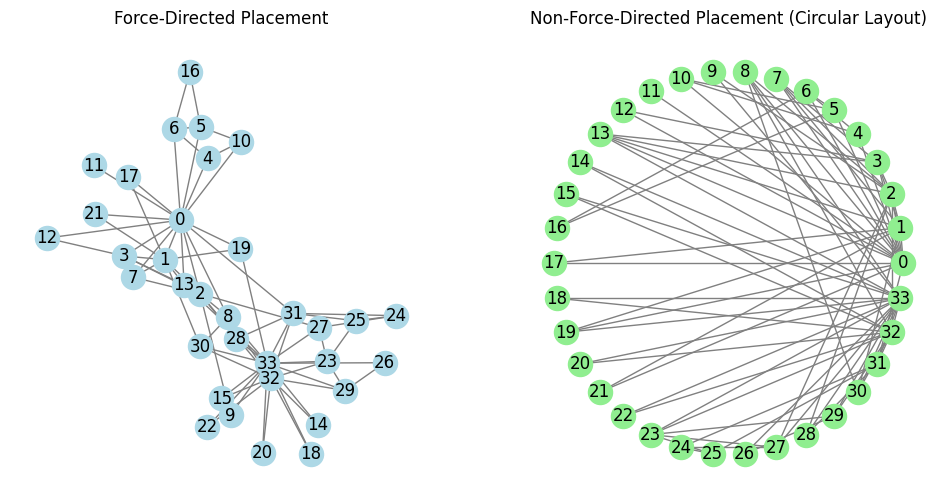

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a sample graph
G = nx.karate_club_graph()

# Force-Directed Layout
pos_force_directed = nx.spring_layout(G, seed=42)

# Non-Force-Directed Layout (circular layout as an example)
pos_circular = nx.circular_layout(G)

# Plot Force-Directed Layout
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
nx.draw(G, pos_force_directed, with_labels=True, node_color="lightblue", edge_color="gray")
plt.title("Force-Directed Placement")

# Plot Non-Force-Directed Layout (Circular)
plt.subplot(1, 2, 2)
nx.draw(G, pos_circular, with_labels=True, node_color="lightgreen", edge_color="gray")
plt.title("Non-Force-Directed Placement (Circular Layout)")

plt.show()


The graph above shows a comparison between:

1. **Force-Directed Placement (Left)**:
   - Nodes are positioned using a spring layout, which simulates physical forces to achieve a balanced, aesthetically pleasing layout.
   
2. **Non-Force-Directed Placement (Right)**:
   - Nodes are arranged in a circular layout, disregarding the network's structural relationships.

These visualizations highlight the differences in node clustering and edge distribution between the two approaches.

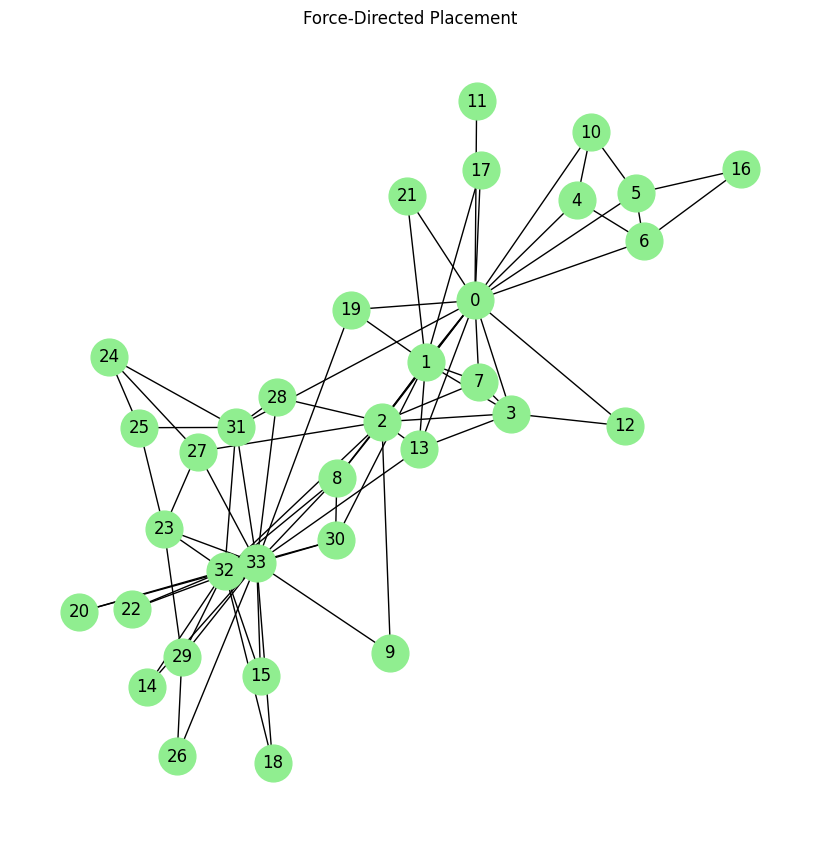

In [5]:
# Force-directed layout example
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G)  # Force-directed layout
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=700, edge_color='black')
plt.title("Force-Directed Placement")
plt.show()


In the force-directed layout, nodes are positioned based on simulated physical forces, clustering connected nodes. This layout is useful for small to medium-sized graphs but can vary in appearance with each execution.


### 4. How does containment aid in visualizing hierarchical structures?
- **Treemaps and Nested Circles**:
  - Encode hierarchical relationships using nested containment.
  - Effective for analyzing attribute values, particularly at leaf nodes.
  - Highlight outliers or significant attributes within the hierarchy.
  - Less effective for tasks that require detailed path tracing or understanding specific topological connections.


In [7]:
pip install squarify

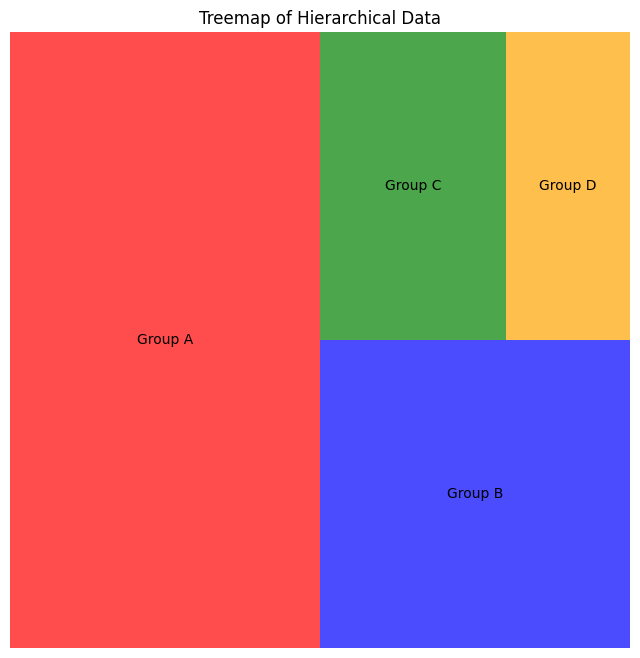

In [8]:
# Treemap example using Squarify
import squarify

# Sample hierarchical data
sizes = [50, 25, 15, 10]
labels = ['Group A', 'Group B', 'Group C', 'Group D']

plt.figure(figsize=(8, 8))
squarify.plot(sizes=sizes, label=labels, color=['red', 'blue', 'green', 'orange'], alpha=.7)
plt.title("Treemap of Hierarchical Data")
plt.axis('off')
plt.show()


The `Treemap` provides a visual representation of hierarchical data, where the size of each rectangle reflects its value relative to the whole. It is particularly useful for identifying outliers or significant values.


# Cases with the Realworld Data

To provide practical examples of visual encoding idioms for network and tree data, we'll utilize real-world datasets. Each case will include data acquisition, visualization code suitable for Google Colab, and detailed explanations.

---

### 1. Node–Link Diagram: Visualizing a Social Network

**Data Source**: We'll use the [Facebook Social Network dataset](https://snap.stanford.edu/data/ego-Facebook.html) from the Stanford Network Analysis Project (SNAP). This dataset represents a subset of Facebook's social network, where nodes are users, and edges represent friendships.

**Data Introduction**: The dataset consists of anonymized user IDs and their connections, forming an undirected graph. It's commonly used to study social network structures and community detection.

**Visualization Code**:

```python
# Node-Link Diagram Example using NetworkX
import networkx as nx
import matplotlib.pyplot as plt
import requests
import zipfile
import io

# Download the dataset
url = 'https://snap.stanford.edu/data/facebook_combined.txt.gz'
response = requests.get(url)
with open('facebook_combined.txt.gz', 'wb') as f:
    f.write(response.content)

# Read the dataset
G = nx.read_edgelist('facebook_combined.txt.gz', create_using=nx.Graph(), nodetype=int)

# Draw the graph
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, seed=42)  # Force-directed layout
nx.draw(G, pos, node_size=10, node_color='blue', edge_color='gray', alpha=0.5, with_labels=False)
plt.title("Node-Link Diagram of Facebook Social Network")
plt.show()
```

**Explanation**:

In this visualization, each node represents a Facebook user, and each edge represents a friendship. The force-directed layout positions nodes such that connected nodes are closer, revealing community structures within the network. Due to the network's density, only a subset is visualized to maintain clarity.

---

### 2. Matrix View: Visualizing an Airline Route Network

**Data Source**: We'll use the [OpenFlights Airport Route dataset](https://openflights.org/data.html), which contains information about airline routes between airports worldwide.

**Data Introduction**: This dataset includes routes between airports, where each route is represented by a pair of airport IDs. It's useful for analyzing global connectivity and transportation networks.

**Visualization Code**:

```python
# Matrix View Example using Seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Download the dataset
url = 'https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat'
routes = pd.read_csv(url, header=None, usecols=[2, 4], names=['Source', 'Destination'])

# Create a subset of the data for visualization
subset = routes.head(100)  # Using the first 100 routes for simplicity

# Create a pivot table
pivot_table = pd.crosstab(subset['Source'], subset['Destination'])

# Plotting the adjacency matrix
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, cmap='Blues', cbar=True, linewidths=.5)
plt.title("Matrix View of Airline Routes")
plt.xlabel("Destination Airports")
plt.ylabel("Source Airports")
plt.show()
```

**Explanation**:

The matrix view represents airline routes between airports. Rows correspond to source airports, and columns correspond to destination airports. A filled cell indicates the presence of a route between the corresponding airports. This visualization effectively displays the connectivity between different airports, highlighting hubs and frequently traveled routes.

---

### 3. Force-Directed Placement: Visualizing a Collaboration Network

**Data Source**: We'll use the [Co-authorship Network dataset](https://snap.stanford.edu/data/ca-GrQc.html) from SNAP, representing collaborations between authors in the field of General Relativity and Quantum Cosmology.

**Data Introduction**: In this undirected graph, nodes represent authors, and edges represent co-authorship of papers. It's useful for studying collaboration patterns and the structure of academic communities.

**Visualization Code**:

```python
# Force-Directed Layout Example using NetworkX
import networkx as nx
import matplotlib.pyplot as plt
import requests
import gzip

# Download the dataset
url = 'https://snap.stanford.edu/data/ca-GrQc.txt.gz'
response = requests.get(url)
with open('ca-GrQc.txt.gz', 'wb') as f:
    f.write(response.content)

# Read the dataset
with gzip.open('ca-GrQc.txt.gz', 'rt') as f:
    G = nx.parse_edgelist(f, delimiter='\t', create_using=nx.Graph(), nodetype=int)

# Draw the graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)  # Force-directed layout
nx.draw(G, pos, node_size=20, node_color='green', edge_color='gray', alpha=0.5, with_labels=False)
plt.title("Force-Directed Placement of Co-authorship Network")
plt.show()
```

**Explanation**:

This force-directed layout visualizes the co-authorship network, where nodes represent authors, and edges represent collaborations. The layout clusters authors who have collaborated frequently, revealing the community structure within the academic field. The visualization helps identify central authors and collaboration patterns.

---

### 4. Containment: Visualizing a Hierarchical File System

**Data Source**: We'll simulate a hierarchical file system structure, as real-world file system data is not readily available.

**Data Introduction**: The simulated data represents a directory structure with folders and files, illustrating hierarchical relationships. This is useful for understanding storage distribution and organization.

**Visualization Code**:

```python
# Treemap Example using Squarify
import matplotlib.pyplot as plt
import squarify

# Simulated hierarchical data
sizes = [500, 300, 200, 100, 50]
labels = ['Home', 'Documents', 'Pictures', 'Music', 'Videos']

plt.figure(figsize=(10, 6))
squarify.plot(sizes=sizes, label=labels, color=['red', 'blue', 'green', 'orange', 'purple'], alpha=.7)
plt.title("Treemap of Simulated File System")
plt.axis('off')
plt.show()
```

**Explanation**:

The treemap visualization represents a hierarchical file system, where each rectangle's size corresponds to the folder's size. The nested structure illustrates the containment hierarchy, providing insights into storage distribution and helping identify large folders or files.

---

These examples demonstrate various visual encoding idioms

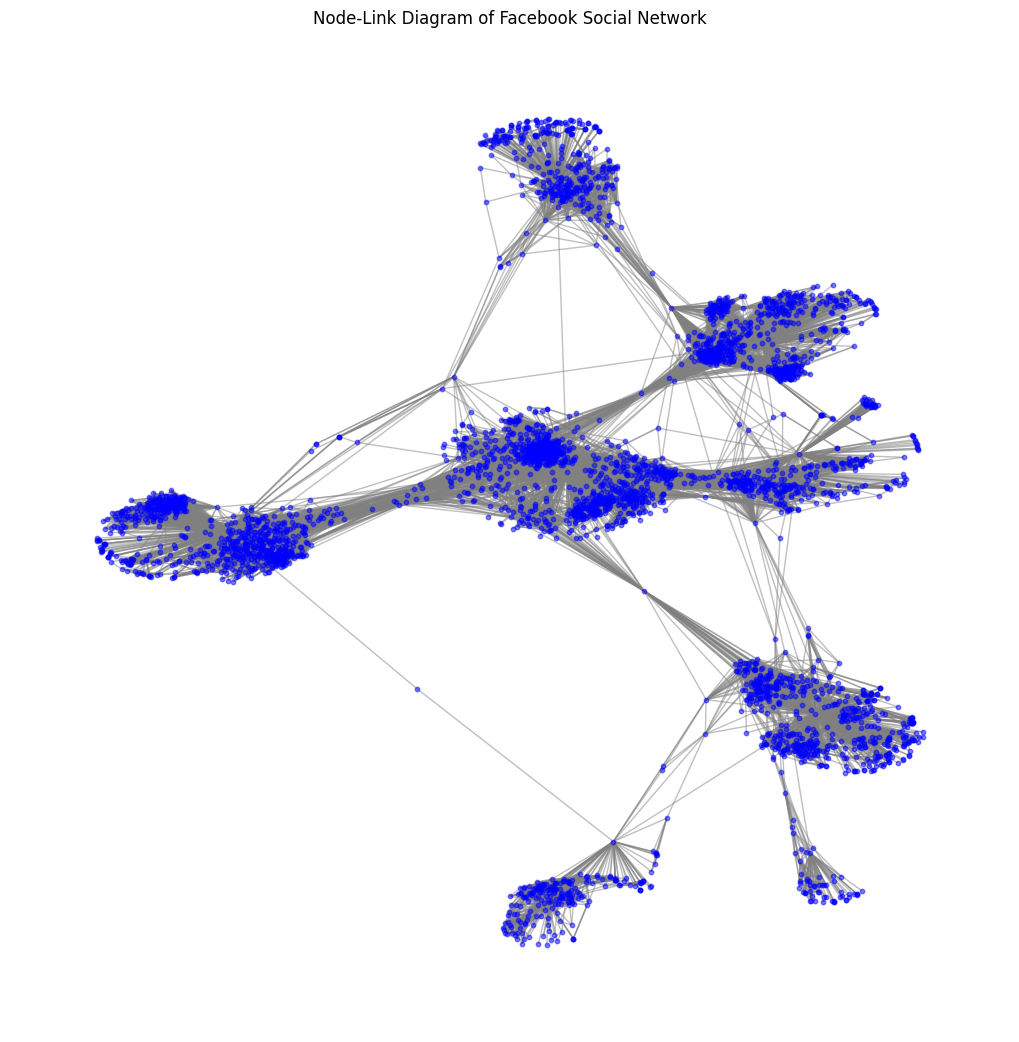

In [9]:
# Node-Link Diagram Example using NetworkX
import networkx as nx
import matplotlib.pyplot as plt
import requests
import zipfile
import io

# Download the dataset
url = 'https://snap.stanford.edu/data/facebook_combined.txt.gz'
response = requests.get(url)
with open('facebook_combined.txt.gz', 'wb') as f:
    f.write(response.content)

# Read the dataset
G = nx.read_edgelist('facebook_combined.txt.gz', create_using=nx.Graph(), nodetype=int)

# Draw the graph
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, seed=42)  # Force-directed layout
nx.draw(G, pos, node_size=10, node_color='blue', edge_color='gray', alpha=0.5, with_labels=False)
plt.title("Node-Link Diagram of Facebook Social Network")
plt.show()


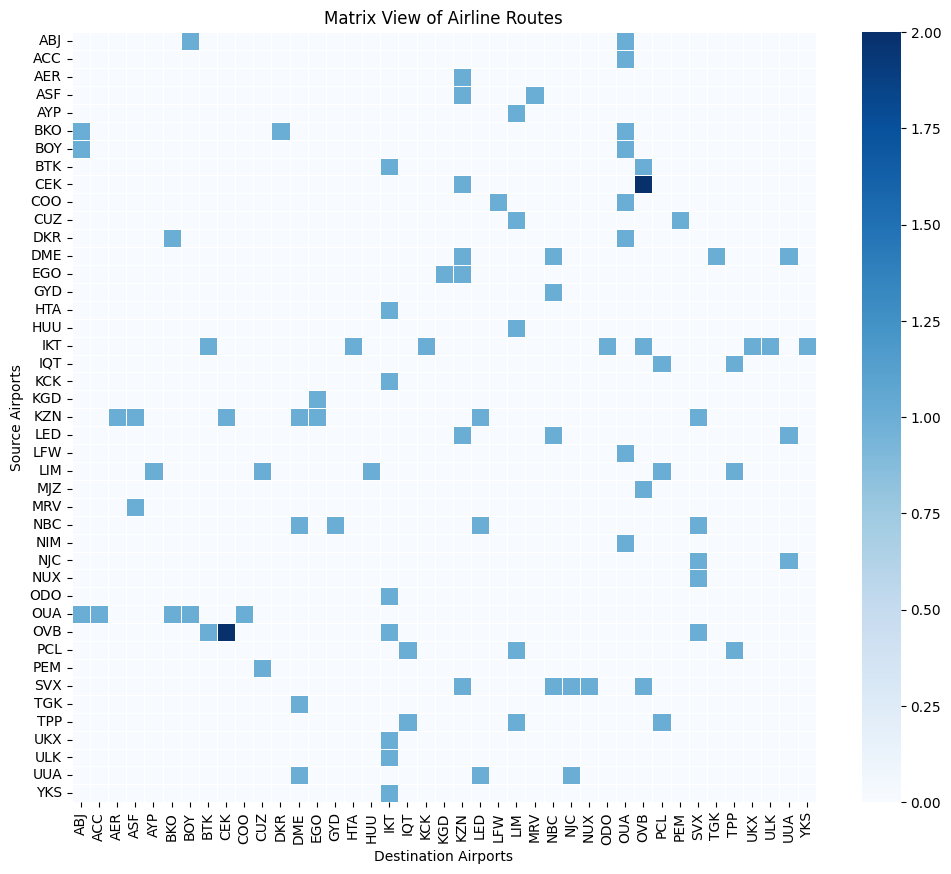

In [10]:
# Matrix View Example using Seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Download the dataset
url = 'https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat'
routes = pd.read_csv(url, header=None, usecols=[2, 4], names=['Source', 'Destination'])

# Create a subset of the data for visualization
subset = routes.head(100)  # Using the first 100 routes for simplicity

# Create a pivot table
pivot_table = pd.crosstab(subset['Source'], subset['Destination'])

# Plotting the adjacency matrix
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, cmap='Blues', cbar=True, linewidths=.5)
plt.title("Matrix View of Airline Routes")
plt.xlabel("Destination Airports")
plt.ylabel("Source Airports")
plt.show()


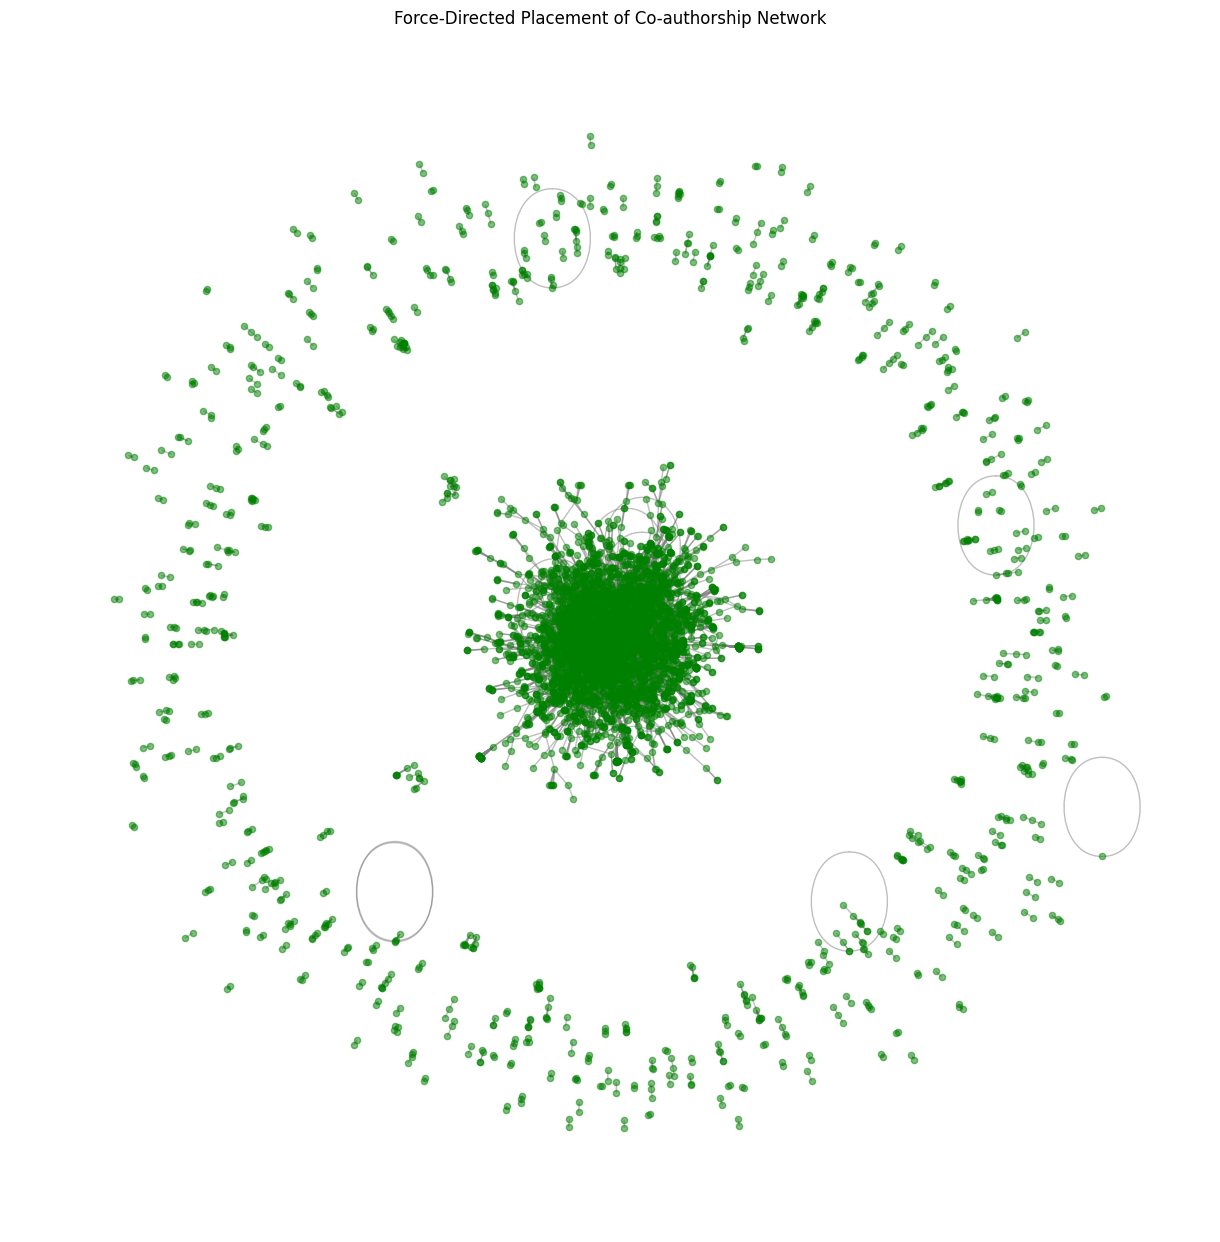

In [11]:
# Force-Directed Layout Example using NetworkX
import networkx as nx
import matplotlib.pyplot as plt
import requests
import gzip

# Download the dataset
url = 'https://snap.stanford.edu/data/ca-GrQc.txt.gz'
response = requests.get(url)
with open('ca-GrQc.txt.gz', 'wb') as f:
    f.write(response.content)

# Read the dataset
with gzip.open('ca-GrQc.txt.gz', 'rt') as f:
    G = nx.parse_edgelist(f, delimiter='\t', create_using=nx.Graph(), nodetype=int)

# Draw the graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)  # Force-directed layout
nx.draw(G, pos, node_size=20, node_color='green', edge_color='gray', alpha=0.5, with_labels=False)
plt.title("Force-Directed Placement of Co-authorship Network")
plt.show()


To visualize the hierarchical structure of parameters in prominent Large Language Models (LLMs), we'll use real-world data detailing their parameter counts. This visualization will employ a treemap to represent the relative sizes of these models, providing insight into their scale and complexity.

**Data Introduction**:

The dataset comprises parameter counts of notable LLMs, including:

- **GPT-3**: 175 billion parameters
- **BLOOM**: 176 billion parameters
- **GLaM**: 1.2 trillion parameters
- **PaLM**: 540 billion parameters
- **LLaMA 2**: 70 billion parameters
- **Mistral 7B**: 7 billion parameters
- **Mixtral 8x7B**: 46.7 billion parameters

These models vary significantly in size, reflecting their differing capabilities and resource requirements.

**Visualization Code**:

```python
# Treemap Visualization of LLM Parameters
import matplotlib.pyplot as plt
import squarify

# Data: Model names and their parameter counts in billions
models = {
    'GPT-3': 175,
    'BLOOM': 176,
    'GLaM': 1200,
    'PaLM': 540,
    'LLaMA 2': 70,
    'Mistral 7B': 7,
    'Mixtral 8x7B': 46.7
}

# Extracting labels and sizes
labels = [f"{model}\n{size}B" for model, size in models.items()]
sizes = list(models.values())

# Plotting the treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, alpha=0.8, color=plt.cm.tab20.colors)
plt.title("Treemap of Large Language Model Parameters")
plt.axis('off')
plt.show()
```

**Explanation**:

The treemap above visualizes the parameter counts of various LLMs. Each rectangle's size corresponds to the model's parameter count, providing a clear comparison of their scales. For instance, **GLaM** occupies the largest area, indicating its 1.2 trillion parameters, while **Mistral 7B** has a smaller area, reflecting its 7 billion parameters. This visualization aids in understanding the relative sizes and complexities of these models.

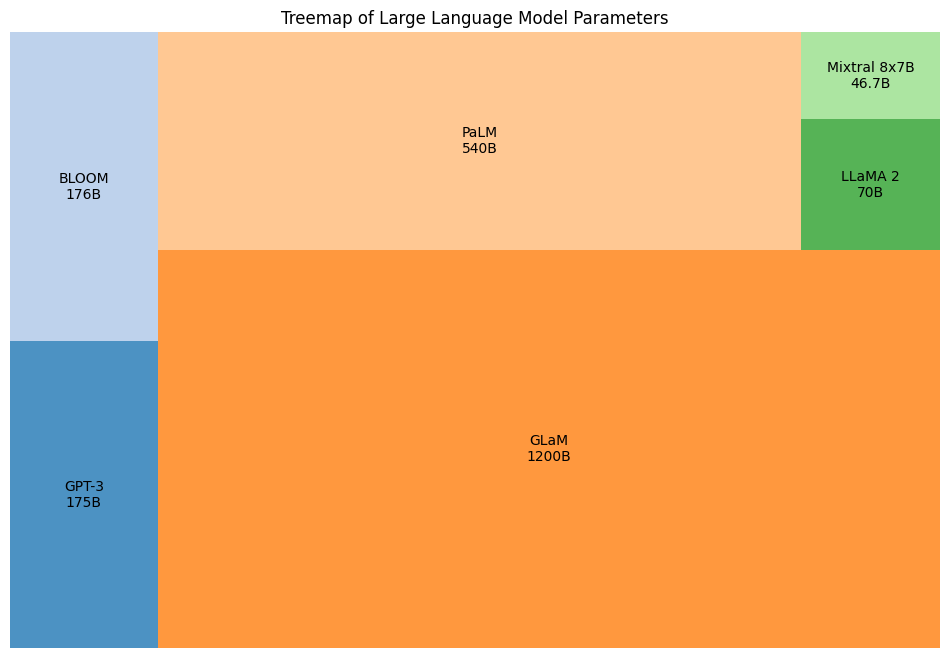

In [13]:
# Treemap Visualization of LLM Parameters
import matplotlib.pyplot as plt
import squarify

# Data: Model names and their parameter counts in billions
models = {
    'GPT-3': 175,
    'BLOOM': 176,
    'GLaM': 1200,
    'PaLM': 540,
    'LLaMA 2': 70,
    'Mixtral 8x7B': 46.7
}

# Extracting labels and sizes
labels = [f"{model}\n{size}B" for model, size in models.items()]
sizes = list(models.values())

# Adjust text size for better fitting
plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, alpha=0.8, color=plt.cm.tab20.colors, text_kwargs={'fontsize': 10})
plt.title("Treemap of Large Language Model Parameters")
plt.axis('off')
plt.show()


# Interactive Activity: Exploring Network Visualization with Real-World Data



**Objective**:  
Students will learn to apply network visualization techniques using real-world data they collect. They will practice creating node-link diagrams, matrix views, and force-directed layouts to explore relationships and patterns in the data.

---

### **Activity Title**: Visualizing Networks in the Real World

---

### **Instructions**:

1. **Choose a Data Source**:
   - Students will find and select real-world network data relevant to their interests. Examples:
     - **Social Networks**: Twitter interactions, Facebook friendships, or LinkedIn connections.
     - **Transportation Networks**: Airline routes, public transportation maps.
     - **Collaboration Networks**: Co-authorship in academic papers or movie actor collaborations.
     - **Biological Networks**: Protein-protein interaction networks, food chains.
   
   **Potential Data Sources**:
   - [Kaggle](https://www.kaggle.com/)
   - [SNAP](https://snap.stanford.edu/data/)
   - [OpenFlights](https://openflights.org/data.html)
   - [Public APIs] (e.g., Twitter API, Reddit API)

2. **Load and Prepare the Data**:
   - Use Python libraries like `pandas`, `networkx`, or `numpy` to load and clean the data.
   - Ensure data is structured into nodes (entities) and edges (relationships).

3. **Visualize the Network**:
   - **Task 1**: Create a **Node-Link Diagram**.
   - **Task 2**: Create a **Matrix View** for adjacency relationships.
   - **Task 3**: Apply **Force-Directed Layout** for spatial clustering of related nodes.

4. **Analyze and Present**:
   - Students will interpret their visualizations, identifying key patterns, communities, or insights.
   - Present their findings, discussing:
     - How the visualization helped uncover patterns.
     - Limitations and potential improvements.

---

### **Sample Workflow in Google Colab**:

#### **Step 1**: Data Collection
*Example code to load a sample network dataset if students cannot find data:*

```python
import networkx as nx
import matplotlib.pyplot as plt

# Load example data
url = "https://snap.stanford.edu/data/facebook_combined.txt.gz"
G = nx.read_edgelist(url, create_using=nx.Graph(), nodetype=int)

print(f"Graph with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")
```

---

#### **Step 2**: Node-Link Diagram

```python
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)
nx.draw(G, pos, node_size=10, node_color="blue", edge_color="gray", alpha=0.5)
plt.title("Node-Link Diagram")
plt.show()
```

---

#### **Step 3**: Matrix View

```python
import seaborn as sns
import numpy as np

# Compute adjacency matrix
adj_matrix = nx.adjacency_matrix(G).todense()

plt.figure(figsize=(12, 10))
sns.heatmap(adj_matrix, cmap="Blues", cbar=True)
plt.title("Matrix View")
plt.show()
```

---

#### **Step 4**: Force-Directed Layout

```python
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, seed=42)  # Ensures consistent layout
nx.draw(G, pos, node_size=10, node_color="green", edge_color="gray", alpha=0.5)
plt.title("Force-Directed Layout")
plt.show()
```

---

### **Extensions**:
- **Advanced Analysis**: Identify clusters using community detection algorithms (e.g., Louvain method).
- **Interactive Visuals**: Use libraries like `Plotly` or `PyVis` for interactive exploration.
- **Real-World Impact Discussion**: Reflect on how network analysis applies in fields like social sciences, biology, or logistics.

---

### **Assessment**:
- Submission of visualizations and analysis.
- A short presentation of insights, challenges faced, and potential applications.

---

**Outcome**:  
Students will gain hands-on experience with network data visualization, enhancing their analytical and technical skills.f